In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv(r'C:\Users\lenovo\OneDrive\Desktop\sklearn-models\data\student_real_world_dataset.csv')

In [ ]:
df.head()

,Student_ID,Name,Age,Gender,Study_Hours_Per_Day,Attendance_Percentage,Internet_Access_at_Home,Extracurricular_Activities,Parental_Education_Level,Family_Income,Previous_Exam_Score,Stress_Level,Sleep_Hours,Passed
0,1001,Arjun,17,Male,2.47,66.68,No,No,Master,High,59.22,6,8.87,0
1,1002,Priya,22,Female,0.75,66.70,No,No,Master,Low,79.27,8,4.68,1
2,1003,Kiran,17,Male,2.22,61.47,No,No,Master,Low,77.27,8,5.16,0
3,1004,Rahul,17,Female,NaN,89.46,No,No,High School,Medium,60.36,7,8.34,1
4,1005,Arjun,22,Female,4.50,86.55,No,Yes,High School,High,55.79,6,8.63,0


In [ ]:
# save the target value in one variable
target_col = 'Passed'

In [ ]:
#Shows all distinct values in Passed
df[target_col].unique()

array([0, 1])

In [ ]:
#Tells whether the target is int float object
df[target_col].dtype

dtype('int64')

In [ ]:
#Check missing values in the target
df[target_col].isnull().sum()

np.int64(0)

In [ ]:
#Check class distribution
df[target_col].value_counts()

Passed
0    266
1    234
Name: count, dtype: int64

In [ ]:
df[target_col].value_counts(normalize=True) * 100

Passed
0    53.2
1    46.8
Name: proportion, dtype: float64

In [ ]:
#Enforce correct target type
df[target_col] = df[target_col].astype(int)

In [ ]:
assert set(df[target_col].unique()) <= {0, 1}

In [ ]:
#Check dataset shape
df.shape

(500, 14)

In [ ]:
df.head()

,Student_ID,Name,Age,Gender,Study_Hours_Per_Day,Attendance_Percentage,Internet_Access_at_Home,Extracurricular_Activities,Parental_Education_Level,Family_Income,Previous_Exam_Score,Stress_Level,Sleep_Hours,Passed
0,1001,Arjun,17,Male,2.47,66.68,No,No,Master,High,59.22,6,8.87,0
1,1002,Priya,22,Female,0.75,66.70,No,No,Master,Low,79.27,8,4.68,1
2,1003,Kiran,17,Male,2.22,61.47,No,No,Master,Low,77.27,8,5.16,0
3,1004,Rahul,17,Female,NaN,89.46,No,No,High School,Medium,60.36,7,8.34,1
4,1005,Arjun,22,Female,4.50,86.55,No,Yes,High School,High,55.79,6,8.63,0


In [ ]:
df.columns

Index(['Student_ID', 'Name', 'Age', 'Gender', 'Study_Hours_Per_Day',
       'Attendance_Percentage', 'Internet_Access_at_Home',
       'Extracurricular_Activities', 'Parental_Education_Level',
       'Family_Income', 'Previous_Exam_Score', 'Stress_Level', 'Sleep_Hours',
       'Passed'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  500 non-null    int64  
 1   Name                        500 non-null    object 
 2   Age                         500 non-null    int64  
 3   Gender                      500 non-null    object 
 4   Study_Hours_Per_Day         475 non-null    float64
 5   Attendance_Percentage       475 non-null    float64
 6   Internet_Access_at_Home     500 non-null    object 
 7   Extracurricular_Activities  500 non-null    object 
 8   Parental_Education_Level    395 non-null    object 
 9   Family_Income               378 non-null    object 
 10  Previous_Exam_Score         500 non-null    float64
 11  Stress_Level                500 non-null    int64  
 12  Sleep_Hours                 475 non-null    float64
 13  Passed                      500 non

In [ ]:
df.describe()

,Student_ID,Age,Study_Hours_Per_Day,Attendance_Percentage,Previous_Exam_Score,Stress_Level,Sleep_Hours,Passed
count,500.000000,500.00000,475.000000,475.000000,500.000000,500.000000,475.000000,500.000000
mean,1250.500000,20.34000,5.314274,80.191453,64.828120,5.678000,6.400568,0.468000
std,144.481833,2.25712,2.793987,11.600235,17.264387,2.900196,1.441207,0.499475
min,1001.000000,17.00000,0.560000,60.200000,35.120000,1.000000,4.000000,0.000000
25%,1125.750000,18.00000,2.845000,69.600000,49.580000,3.000000,5.155000,0.000000
50%,1250.500000,20.00000,5.420000,80.760000,65.685000,6.000000,6.390000,0.000000
75%,1375.250000,22.00000,7.740000,89.730000,79.272500,8.000000,7.510000,1.000000
max,1500.000000,24.00000,9.980000,99.980000,94.930000,10.000000,8.990000,1.000000


In [ ]:
df.describe(include='object')

,Name,Gender,Internet_Access_at_Home,Extracurricular_Activities,Parental_Education_Level,Family_Income
count,500,500,500,500,395,378
unique,10,2,2,2,4,3
top,Amit,Male,No,Yes,PhD,Low
freq,62,257,271,264,103,138


In [ ]:
df.isnull().sum()

Student_ID                      0
Name                            0
Age                             0
Gender                          0
Study_Hours_Per_Day            25
Attendance_Percentage          25
Internet_Access_at_Home         0
Extracurricular_Activities      0
Parental_Education_Level      105
Family_Income                 122
Previous_Exam_Score             0
Stress_Level                    0
Sleep_Hours                    25
Passed                          0
dtype: int64

In [ ]:
df.isnull().sum()[df.isnull().sum() > 0]

Study_Hours_Per_Day          25
Attendance_Percentage        25
Parental_Education_Level    105
Family_Income               122
Sleep_Hours                  25
dtype: int64

In [ ]:
X = df.drop(columns=[target_col])
y = df[target_col]

In [ ]:
X.head()

,Student_ID,Name,Age,Gender,Study_Hours_Per_Day,Attendance_Percentage,Internet_Access_at_Home,Extracurricular_Activities,Parental_Education_Level,Family_Income,Previous_Exam_Score,Stress_Level,Sleep_Hours
0,1001,Arjun,17,Male,2.47,66.68,No,No,Master,High,59.22,6,8.87
1,1002,Priya,22,Female,0.75,66.70,No,No,Master,Low,79.27,8,4.68
2,1003,Kiran,17,Male,2.22,61.47,No,No,Master,Low,77.27,8,5.16
3,1004,Rahul,17,Female,NaN,89.46,No,No,High School,Medium,60.36,7,8.34
4,1005,Arjun,22,Female,4.50,86.55,No,Yes,High School,High,55.79,6,8.63


In [ ]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: Passed, dtype: int64

In [ ]:
drop_cols = ['Student_ID', 'Name']
X = X.drop(columns=drop_cols, errors='ignore', axis=1)

In [ ]:
X.head()

,Age,Gender,Study_Hours_Per_Day,Attendance_Percentage,Internet_Access_at_Home,Extracurricular_Activities,Parental_Education_Level,Family_Income,Previous_Exam_Score,Stress_Level,Sleep_Hours
0,17,Male,2.47,66.68,No,No,Master,High,59.22,6,8.87
1,22,Female,0.75,66.70,No,No,Master,Low,79.27,8,4.68
2,17,Male,2.22,61.47,No,No,Master,Low,77.27,8,5.16
3,17,Female,NaN,89.46,No,No,High School,Medium,60.36,7,8.34
4,22,Female,4.50,86.55,No,Yes,High School,High,55.79,6,8.63


In [ ]:
X.columns

Index(['Age', 'Gender', 'Study_Hours_Per_Day', 'Attendance_Percentage',
       'Internet_Access_at_Home', 'Extracurricular_Activities',
       'Parental_Education_Level', 'Family_Income', 'Previous_Exam_Score',
       'Stress_Level', 'Sleep_Hours'],
      dtype='object')

In [ ]:
constant_col = [col for col in X.columns if X[col].nunique() <= 1]
constant_col

[]

In [ ]:
X = X.drop(columns=constant_col)

In [ ]:
X.shape

(500, 11)

In [ ]:
y.shape

(500,)

In [ ]:
X.duplicated().any()

np.False_

In [ ]:
X.duplicated().sum()

np.int64(0)

In [ ]:
X[X.duplicated(keep=False)]

,Age,Gender,Study_Hours_Per_Day,Attendance_Percentage,Internet_Access_at_Home,Extracurricular_Activities,Parental_Education_Level,Family_Income,Previous_Exam_Score,Stress_Level,Sleep_Hours


In [ ]:
X[X.duplicated(subset=["Age", "Gender", "Previous_Exam_Score"], keep=False)]

,Age,Gender,Study_Hours_Per_Day,Attendance_Percentage,Internet_Access_at_Home,Extracurricular_Activities,Parental_Education_Level,Family_Income,Previous_Exam_Score,Stress_Level,Sleep_Hours
20,23,Female,8.75,72.65,Yes,Yes,Bachelor,High,72.42,10,5.38
55,21,Female,4.14,97.24,Yes,Yes,NaN,NaN,35.50,5,6.04
270,21,Female,6.36,75.22,Yes,No,Master,NaN,35.50,5,8.49
378,23,Female,1.85,70.19,No,No,Bachelor,High,72.42,1,5.40


In [ ]:
X = X.drop_duplicates()
X.head()

,Age,Gender,Study_Hours_Per_Day,Attendance_Percentage,Internet_Access_at_Home,Extracurricular_Activities,Parental_Education_Level,Family_Income,Previous_Exam_Score,Stress_Level,Sleep_Hours
0,17,Male,2.47,66.68,No,No,Master,High,59.22,6,8.87
1,22,Female,0.75,66.70,No,No,Master,Low,79.27,8,4.68
2,17,Male,2.22,61.47,No,No,Master,Low,77.27,8,5.16
3,17,Female,NaN,89.46,No,No,High School,Medium,60.36,7,8.34
4,22,Female,4.50,86.55,No,Yes,High School,High,55.79,6,8.63


In [ ]:
y = y.loc[X.index]
y.head()

0    0
1    1
2    0
3    1
4    0
Name: Passed, dtype: int64

In [ ]:
X.duplicated().any()

np.False_

In [ ]:
X.isnull().sum()

Age                             0
Gender                          0
Study_Hours_Per_Day            25
Attendance_Percentage          25
Internet_Access_at_Home         0
Extracurricular_Activities      0
Parental_Education_Level      105
Family_Income                 122
Previous_Exam_Score             0
Stress_Level                    0
Sleep_Hours                    25
dtype: int64

In [ ]:
X.isnull().sum()[X.isnull().sum()>0]

Study_Hours_Per_Day          25
Attendance_Percentage        25
Parental_Education_Level    105
Family_Income               122
Sleep_Hours                  25
dtype: int64

In [ ]:
(X.isnull().sum() / len(X)) * 100

Age                            0.0
Gender                         0.0
Study_Hours_Per_Day            5.0
Attendance_Percentage          5.0
Internet_Access_at_Home        0.0
Extracurricular_Activities     0.0
Parental_Education_Level      21.0
Family_Income                 24.4
Previous_Exam_Score            0.0
Stress_Level                   0.0
Sleep_Hours                    5.0
dtype: float64

In [ ]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
cat_cols = X.select_dtypes(include=['object']).columns

In [ ]:
X[num_cols].isnull().sum()

Age                       0
Study_Hours_Per_Day      25
Attendance_Percentage    25
Previous_Exam_Score       0
Stress_Level              0
Sleep_Hours              25
dtype: int64

In [ ]:
X[cat_cols].isnull().sum()

Gender                          0
Internet_Access_at_Home         0
Extracurricular_Activities      0
Parental_Education_Level      105
Family_Income                 122
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
num_imputer = SimpleImputer(strategy="median")

X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

In [ ]:
#With pandas
# median_values = X_train[num_cols].median()

# X_train[num_cols] = X_train[num_cols].fillna(median_values)
# X_test[num_cols] = X_test[num_cols].fillna(median_values)

In [ ]:
cat_imputer = SimpleImputer(strategy="most_frequent")

X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

In [ ]:
#With pandas
# mode_values = X_train[cat_cols].mode().iloc[0]

# X_train[cat_cols] = X_train[cat_cols].fillna(mode_values)
# X_test[cat_cols] = X_test[cat_cols].fillna(mode_values)


In [ ]:
X_train.isnull().sum()

Age                           0
Gender                        0
Study_Hours_Per_Day           0
Attendance_Percentage         0
Internet_Access_at_Home       0
Extracurricular_Activities    0
Parental_Education_Level      0
Family_Income                 0
Previous_Exam_Score           0
Stress_Level                  0
Sleep_Hours                   0
dtype: int64

In [ ]:
X_test.isnull().sum()

Age                           0
Gender                        0
Study_Hours_Per_Day           0
Attendance_Percentage         0
Internet_Access_at_Home       0
Extracurricular_Activities    0
Parental_Education_Level      0
Family_Income                 0
Previous_Exam_Score           0
Stress_Level                  0
Sleep_Hours                   0
dtype: int64

In [ ]:
cat_cols = X_train.select_dtypes(include=['object']).columns
cat_cols

Index(['Gender', 'Internet_Access_at_Home', 'Extracurricular_Activities',
       'Parental_Education_Level', 'Family_Income'],
      dtype='object')

In [ ]:
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['Age', 'Study_Hours_Per_Day', 'Attendance_Percentage',
       'Previous_Exam_Score', 'Stress_Level', 'Sleep_Hours'],
      dtype='object')

In [ ]:
X_train[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 249 to 102
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Gender                      400 non-null    object
 1   Internet_Access_at_Home     400 non-null    object
 2   Extracurricular_Activities  400 non-null    object
 3   Parental_Education_Level    400 non-null    object
 4   Family_Income               400 non-null    object
dtypes: object(5)
memory usage: 18.8+ KB


In [ ]:
X_train[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 249 to 102
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    400 non-null    float64
 1   Study_Hours_Per_Day    400 non-null    float64
 2   Attendance_Percentage  400 non-null    float64
 3   Previous_Exam_Score    400 non-null    float64
 4   Stress_Level           400 non-null    float64
 5   Sleep_Hours            400 non-null    float64
dtypes: float64(6)
memory usage: 21.9 KB


In [ ]:
X_train.head()

,Age,Gender,Study_Hours_Per_Day,Attendance_Percentage,Internet_Access_at_Home,Extracurricular_Activities,Parental_Education_Level,Family_Income,Previous_Exam_Score,Stress_Level,Sleep_Hours
249,17.0,Female,8.74,88.35,No,No,High School,Low,58.36,10.0,4.98
433,17.0,Female,9.97,89.92,No,No,High School,Low,92.66,8.0,6.26
19,17.0,Male,1.83,97.36,Yes,Yes,PhD,Low,70.94,7.0,6.72
322,19.0,Female,4.61,72.13,No,Yes,Master,Low,73.18,10.0,7.01
332,22.0,Female,2.52,81.08,No,No,PhD,High,81.68,8.0,6.76


In [ ]:
binary_map = {
    "Gender" : {'Male':1, 'Female' : 0},
    "Internet_Access_at_Home" : {'Yes': 1, 'No':0},
    "Extracurricular_Activities" : {'Yes': 1, 'No':0}
} 

for col, mapping in binary_map.items():
    X_train[col] = X_train[col].map(mapping)
    X_test[col] = X_test[col].map(mapping)

In [ ]:
X_train.isnull().sum()[X_train.isnull().sum()>0]

Series([], dtype: int64)

In [ ]:
X_train.head()

,Age,Gender,Study_Hours_Per_Day,Attendance_Percentage,Internet_Access_at_Home,Extracurricular_Activities,Parental_Education_Level,Family_Income,Previous_Exam_Score,Stress_Level,Sleep_Hours
249,17.0,0,8.74,88.35,0,0,High School,Low,58.36,10.0,4.98
433,17.0,0,9.97,89.92,0,0,High School,Low,92.66,8.0,6.26
19,17.0,1,1.83,97.36,1,1,PhD,Low,70.94,7.0,6.72
322,19.0,0,4.61,72.13,0,1,Master,Low,73.18,10.0,7.01
332,22.0,0,2.52,81.08,0,0,PhD,High,81.68,8.0,6.76


In [ ]:
X_train['Parental_Education_Level'].unique()

array(['High School', 'PhD', 'Master', 'Bachelor'], dtype=object)

In [ ]:
X_train['Family_Income'].unique()

array(['Low', 'High', 'Medium'], dtype=object)

In [ ]:
eduction_map = {
    'High School' : 1,
    'Bachelor' : 2,
    'Master': 3,
    'PhD': 4,   
}

income_map = {
    'Low': 1,
    'mediun': 2,
    'High' : 3
}

In [ ]:
X_train['Parental_Education_Level'] = X_train['Parental_Education_Level'].map(eduction_map)
X_test['Parental_Education_Level'] = X_test['Parental_Education_Level'].map(eduction_map)

In [ ]:
X_train["Family_Income"] = X_train["Family_Income"].map(income_map)
X_test["Family_Income"] = X_test["Family_Income"].map(income_map)

In [ ]:
X_train.isnull().sum()

Age                            0
Gender                         0
Study_Hours_Per_Day            0
Attendance_Percentage          0
Internet_Access_at_Home        0
Extracurricular_Activities     0
Parental_Education_Level       0
Family_Income                 92
Previous_Exam_Score            0
Stress_Level                   0
Sleep_Hours                    0
dtype: int64

In [ ]:
X_train.isnull().sum()[X_train.isnull().sum()>0]

Family_Income    92
dtype: int64

In [ ]:
X_train['Family_Income'].isna().sum()

np.int64(92)

In [ ]:
ordinal_cols = ["Family_Income"]

ord_imputer = SimpleImputer(strategy="most_frequent")

X_train_ord = ord_imputer.fit_transform(X_train[ordinal_cols])
X_test_ord = ord_imputer.transform(X_test[ordinal_cols])

X_train[ordinal_cols] = pd.DataFrame(
    X_train_ord,
    columns=ordinal_cols,
    index=X_train.index
)

X_test[ordinal_cols] = pd.DataFrame(
    X_test_ord,
    columns=ordinal_cols,
    index=X_test.index
)

In [ ]:
X_train.isnull().sum()

Age                           0
Gender                        0
Study_Hours_Per_Day           0
Attendance_Percentage         0
Internet_Access_at_Home       0
Extracurricular_Activities    0
Parental_Education_Level      0
Family_Income                 0
Previous_Exam_Score           0
Stress_Level                  0
Sleep_Hours                   0
dtype: int64

In [ ]:
num_cols = X_train.columns
num_cols

Index(['Age', 'Gender', 'Study_Hours_Per_Day', 'Attendance_Percentage',
       'Internet_Access_at_Home', 'Extracurricular_Activities',
       'Parental_Education_Level', 'Family_Income', 'Previous_Exam_Score',
       'Stress_Level', 'Sleep_Hours'],
      dtype='object')

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns,
    index=X_train.index
)

X_test_scaled = pd.DataFrame(
    X_test_scaled,
    columns=X_test.columns,
    index=X_test.index
)

In [ ]:
X_train_scaled.describe().loc[["mean", "std"]]

,Age,Gender,Study_Hours_Per_Day,Attendance_Percentage,Internet_Access_at_Home,Extracurricular_Activities,Parental_Education_Level,Family_Income,Previous_Exam_Score,Stress_Level,Sleep_Hours
mean,5.639933e-16,6.550316e-17,-4.884981e-17,4.285461e-16,-1.665335e-17,3.552714e-17,1.643130e-16,-1.665335e-17,-4.618528e-16,6.550316e-17,-7.949197e-16
std,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00


In [ ]:
log_reg = LogisticRegression(
    max_iter=1000,
    random_state=42
)

In [ ]:
log_reg.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [ ]:
y_train_pred = log_reg.predict(X_train_scaled)
y_train_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [ ]:
y_test_pred = log_reg.predict(X_test_scaled)
y_test_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
train_acc = accuracy_score(y_train, y_train_pred)
print(train_acc)

0.585


In [ ]:
test_acc = accuracy_score(y_test, y_test_pred)
print(test_acc)

0.56


In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.58      0.75      0.65        55
           1       0.52      0.33      0.41        45

    accuracy                           0.56       100
   macro avg       0.55      0.54      0.53       100
weighted avg       0.55      0.56      0.54       100



In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[41, 14],
       [30, 15]])

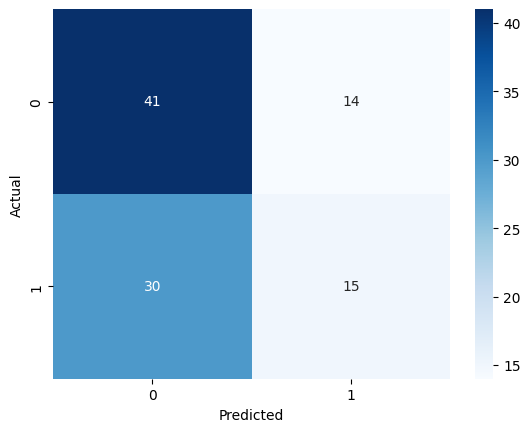

In [ ]:
sns.heatmap(
    confusion_matrix(y_test, y_test_pred),
    annot=True,
    fmt="d",
    cmap="Blues"
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()